# Mengimport Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- Pandas: Untuk membaca, mengolah, dan menganalisis data (misalnya, pd.read_csv(), df.info()).
- NumPy: Untuk komputasi numerik
- Matplotlib: Untuk membuat visualisasi dasar (misalnya, plt.figure(), plt.show()).
- Seaborn: Untuk visualisasi yang lebih menarik dan informatif (misalnya, sns.boxplot()

# Membaca File CSV

In [2]:
# Membaca data dari file CSV  ke dalam DataFrame
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# Melihat Informasi Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


# Menampilkan 10 Record Pertama Dataset

In [4]:
df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


# Menampilkan Korelasi Dataset menggunakan heatmap

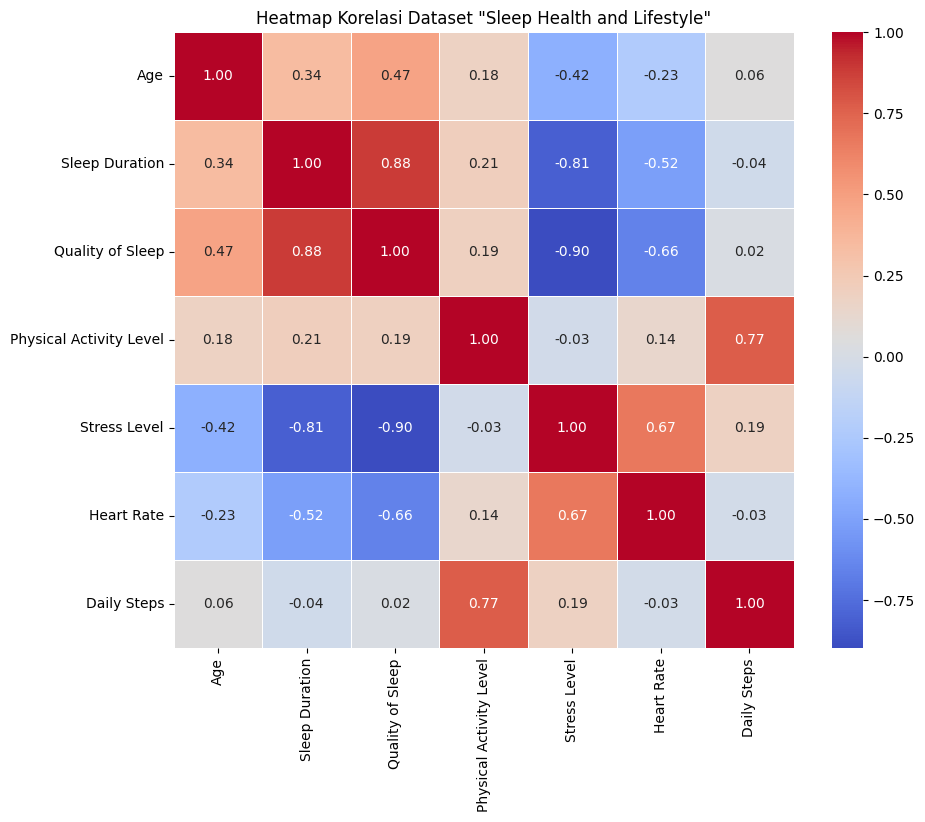

In [5]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Menghapus Kolom 'Person ID'
numeric_columns_no_id = df[numeric_columns].drop(columns=['Person ID'])

# Menghitung matrik korelasi untuk kolom dengan tipe data numerik
correlation_matrix_no_id = numeric_columns_no_id.corr()

#  Membuat heatmap dari matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_no_id, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Dataset "Sleep Health and Lifestyle"', fontsize=12)
plt.show()

# Data Cleaning

## Handling Missing Value (Nilai Null)

In [6]:
# Memeriksa Jumlah Nilai Null
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [7]:
# Mengganti NaN dengan 'No Disorder' dalam kolom "Sleep Disorder"
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('No Disorder')

# Memeriksa nilai unik yang diperbarui untuk memastikan penggantian berhasil
updated_unique_values = df['Sleep Disorder'].unique()
print(updated_unique_values)

# Mmeriksa Jumlah Nilai Null
df.isnull().sum()

['No Disorder' 'Sleep Apnea' 'Insomnia']


,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


- Menggunakan Nilai Default

  Saya memilih untuk mengganti nilai NaN di kolom "Sleep Disorder" dengan "No Disorder" karena:

  1. Kejelasan: Dengan mengganti NaN menjadi "No Disorder," jadi lebih jelas bahwa orang tersebut tidak memiliki gangguan tidur.

  2. Konsistensi: Semua data akan terlihat sama, sehingga lebih mudah untuk dianalisis.

  3. Menjaga Data: Saya tidak ingin kehilangan banyak data. Dengan mengganti nilai yang hilang, saya tetap bisa menggunakan semua baris yang ada.

  4. Relevansi: Informasi ini penting untuk analisis kesehatan tidur, karena menunjukkan bahwa tidak semua orang memiliki masalah tidur.

  4. Mudah Dipahami: Istilah "No Disorder" lebih mudah dimengerti oleh semua orang yang melihat data, jadi hasil analisis bisa lebih jelas.

## Handling Duplikat Value (Nilai Duplikat)

In [8]:
duplicate = df.duplicated().sum()
print("jumlah data yang duplikat = ", duplicate)

jumlah data yang duplikat =  0


## Handling Outlier

Text(0.5, 1.0, 'Histogram of Heart Rate')

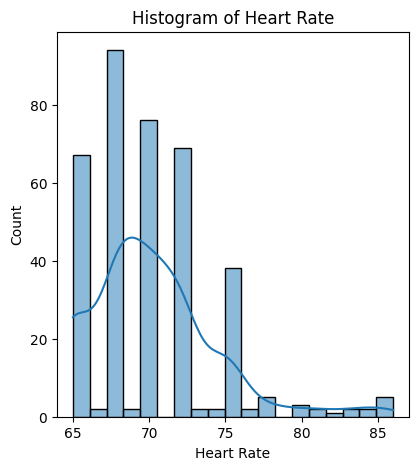

In [9]:
# Memeriksa Ditribusi data pada kolom 'Heart Rate'
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Heart Rate'], kde=True)
plt.title("Histogram of Heart Rate")

- Distribusi 'Heart Rate' pada histogram ini tidak normal dan cenderung skewed ke kanan (right-skewed), dengan mayoritas nilai berada di rentang 65 hingga 72.5, sementara ada beberapa outlier di rentang yang lebih tinggi di atas 75.

Berdasarkan hasil distribusi data diatas, dapat disimpulkan bahwa:

- Metode IQR : Metode ini sangat cocok karena distribusi data ini tidak normal. Metode IQR cocok untuk digunakan karena lebih mengandalkan posisi relatif nilai dalam data dan tidak terpengaruh oleh rata-rata atau standar deviasi.
- Metode Z-Core : Metode ini kurang cocok karena Z-score bekerja lebih baik jika distribusi data mendekati distribusi normal (bell curve), karena Z-score mengasumsikan simetri dalam distribusi data, sehingga dengan mengggunakan metode ini tidak akan menghapus semua outlier

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Heart Rate'>

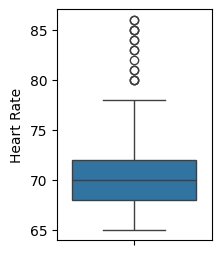

In [10]:
# Melakukan pengecekan outlier menggunakan boxplot
fig, ax = plt.subplots(figsize=(2,3))
sns.boxplot(df['Heart Rate'])

- Berdasarkan visualisasi dengan menggunakan Gafik Box Plot, pada kolom 'Heart Rate' terlihat adanya data outlier yang signifikan
- Titik-titik di atas whisker atas menunjukkan outliers, atau data yang jauh di atas rentang normal. Pada gambar, terdapat sejumlah outlier di atas angka 80 bpm. Kehadiran outlier ini mengindikasikan bahwa beberapa nilai 'Heart Rate' sangat berbeda dari mayoritas data lainnya

### Metode IQR

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


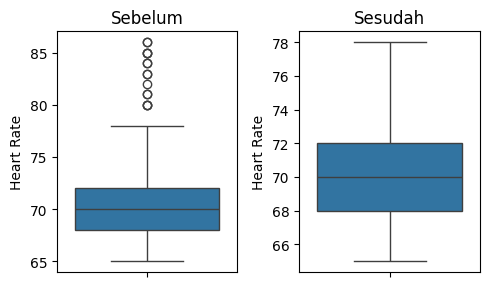

In [11]:
from scipy import stats

# Sebelum handling outlier
fig, axes = plt.subplots(1, 2, figsize=(5, 3))
plt.tight_layout()
sns.boxplot(df['Heart Rate'], orient='v', ax=axes[0])
axes[0].title.set_text("Sebelum")

# Menghitung Q1, Q3, dan IQR
Q1 = df['Heart Rate'].quantile(0.25)
Q3 = df['Heart Rate'].quantile(0.75)
IQR = Q3 - Q1  # Hitung IQR dengan benar

# Menghapus outlier
df_filtered = df[~((df['Heart Rate'] < (Q1 - 1.5 * IQR)) | (df['Heart Rate'] > (Q3 + 1.5 * IQR)))]

# Setelah handling outlier
sns.boxplot(df_filtered['Heart Rate'], orient='v', ax=axes[1])
axes[1].title.set_text("Sesudah")
plt.show()

Berdasarkan visualisasi gambar diatas:
- Distribusi lebih rapat: Setelah outlier dihapus, distribusi data menjadi lebih rapat tanpa ada titik-titik yang menonjol di luar whiskers. Ini menunjukkan bahwa nilai ekstrem telah berhasil dihilangkan.
- Konsistensi data: Penghapusan outlier memastikan bahwa data lebih representatif terhadap mayoritas distribusi, sehingga boxplot lebih stabil dan simetris.
- Skala lebih kecil: Sumbu Y pada boxplot kedua lebih kecil dengan rentang nilai berkisar antara 68 hingga 72 bpm, karena distribusi data lebih sempit di sekitar nilai median 70 bpm.

### Metode Z-Core

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


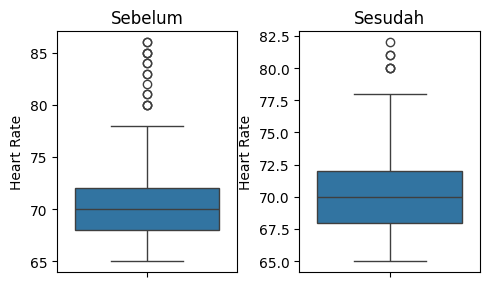

In [12]:
from scipy import stats

# Sebelum handling outlier
fig, axes = plt.subplots(1, 2, figsize=(5, 3))
plt.tight_layout()
sns.boxplot(df['Heart Rate'], orient='v', ax=axes[0])
axes[0].title.set_text("Sebelum")

# Menghitung Z-Score
z_scores = np.abs(stats.zscore(df['Heart Rate']))

# Menghapus outlier dengan threshold Z-Score < 3
df_filtered = df[z_scores < 3]  # Simpan hasil filter dalam DataFrame baru

# Setelah handling outlier
sns.boxplot(df_filtered['Heart Rate'], orient='v', ax=axes[1])
axes[1].title.set_text("Sesudah")
plt.show()

Berdasarkan Visualisasi gambar diatas:
- Distribusi lebih rapat: Setelah penanganan outlier, distribusi data menjadi lebih terkonsentrasi, meskipun masih ada beberapa outlier di atas whiskers. Outlier ini berada di kisaran 77.5 hingga 82.5 pada boxplot, yang mungkin tidak dianggap cukup ekstrem untuk dihapus oleh Z-score.

- Konsistensi data: Penghapusan outlier membuat distribusi lebih representatif terhadap mayoritas data, tetapi boxplot belum sepenuhnya simetris karena distribusi awal yang skewed ke kanan.

- Skala lebih kecil: Rentang nilai pada boxplot kedua berkisar antara 67.5 hingga 72.5 bpm, dengan median di sekitar 70 bpm, menunjukkan distribusi data yang lebih sempit

# 2. Data Transformation

In [13]:
# Menghapus kolom 'id' dari DataFrame
df = df.drop(columns=['Person ID'])
df.head(10)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No Disorder
8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No Disorder
9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No Disorder


## Encoding kolom numerik

In [14]:
from sklearn.preprocessing import OrdinalEncoder

# Inisialisasi OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Lakukan encoding
df[['Physical Activity Level', 'Heart Rate', 'Daily Steps', 'Age']] = ordinal_encoder.fit_transform(
    df[['Physical Activity Level', 'Heart Rate', 'Daily Steps', 'Age']]

).astype(int)  # Mengubah hasil encoding menjadi tipe integer

# Menampilkan hasil 10 baris pertama
df.head(10)


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,0,Software Engineer,6.1,6,4,6,Overweight,126/83,10,6,No Disorder
1,Male,1,Doctor,6.2,6,9,8,Normal,125/80,8,19,No Disorder
2,Male,1,Doctor,6.2,6,9,8,Normal,125/80,8,19,No Disorder
3,Male,1,Sales Representative,5.9,4,0,8,Obese,140/90,17,0,Sleep Apnea
4,Male,1,Sales Representative,5.9,4,0,8,Obese,140/90,17,0,Sleep Apnea
5,Male,1,Software Engineer,5.9,4,0,8,Obese,140/90,17,0,Insomnia
6,Male,2,Teacher,6.3,6,3,7,Obese,140/90,14,2,Insomnia
7,Male,2,Doctor,7.8,7,12,6,Normal,120/80,4,18,No Disorder
8,Male,2,Doctor,7.8,7,12,6,Normal,120/80,4,18,No Disorder
9,Male,2,Doctor,7.8,7,12,6,Normal,120/80,4,18,No Disorder


## Encoding kolom categorical

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

# Proses encoding kolom kategorikal
col = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']
le=LabelEncoder()
for i in col:
    df[i]=le.fit_transform(df[i])

df.head(10)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,0,9,6.1,6,4,6,3,11,10,6,1
1,1,1,1,6.2,6,9,8,0,9,8,19,1
2,1,1,1,6.2,6,9,8,0,9,8,19,1
3,1,1,6,5.9,4,0,8,2,22,17,0,2
4,1,1,6,5.9,4,0,8,2,22,17,0,2
5,1,1,9,5.9,4,0,8,2,22,17,0,0
6,1,2,10,6.3,6,3,7,2,22,14,2,0
7,1,2,1,7.8,7,12,6,0,6,4,18,1
8,1,2,1,7.8,7,12,6,0,6,4,18,1
9,1,2,1,7.8,7,12,6,0,6,4,18,1


## Normalisasi kolom Numerik

In [16]:
from sklearn.preprocessing import MinMaxScaler
# 1. Inisialisasi MinMaxScaler
min_max_scaler = MinMaxScaler()

# 2. Melakukan normalisasi pada kolom yang diinginkan
df[['Sleep Duration', 'Stress Level', 'Quality of Sleep']] = min_max_scaler.fit_transform(
    df[['Sleep Duration', 'Stress Level', 'Quality of Sleep']]
)

# 3. Menampilkan 10 baris pertama
df.head(10)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,0,9,0.111111,0.4,4,0.6,3,11,10,6,1
1,1,1,1,0.148148,0.4,9,1.0,0,9,8,19,1
2,1,1,1,0.148148,0.4,9,1.0,0,9,8,19,1
3,1,1,6,0.037037,0.0,0,1.0,2,22,17,0,2
4,1,1,6,0.037037,0.0,0,1.0,2,22,17,0,2
5,1,1,9,0.037037,0.0,0,1.0,2,22,17,0,0
6,1,2,10,0.185185,0.4,3,0.8,2,22,14,2,0
7,1,2,1,0.740741,0.6,12,0.6,0,6,4,18,1
8,1,2,1,0.740741,0.6,12,0.6,0,6,4,18,1
9,1,2,1,0.740741,0.6,12,0.6,0,6,4,18,1


# Supervised Learning

## Mengimport library

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score

## Support Vector Classifier (SVM)

Klasifikasi
-	Fitur (x) :  Quality of Sleep, Stress Level
-	Target/label (y) : Sleep disorder



**Alasan memilih fitur dan target untuk klasifikasi:**

Target: Sleep Disorder dipilih karena merupakan variabel kategorikal yang relevan dalam mengidentifikasi masalah kesehatan tidur.

Fitur:

- Quality of Sleep: Korelasi kuat dengan gangguan tidur, kualitas tidur rendah sering terkait dengan insomnia atau apnea.
- Stress Level: Korelasi tinggi dengan gangguan tidur, stres yang lebih tinggi sering memicu masalah tidur.
Keduanya dipilih karena pengaruh signifikan dalam memprediksi gangguan tidur.

### A1. Implementasi Metode

In [18]:
from imblearn.over_sampling import SMOTE
# Memilih fitur dan target
X = df[['Quality of Sleep', 'Stress Level']]
y = df['Sleep Disorder']

# Bagi data ke train set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mengatasi ketidakseimbangan kelas dengan SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Melatih model dengan data yang telah diseimbangkan
svm_model = SVC(kernel="linear")
svm_model.fit(X_train_resampled, y_train_resampled)

# Prediksi hasil pada data uji
y_pred = svm_model.predict(X_test)

# Simpan nilai Support Vectors
support_vectors = svm_model.support_vectors_

### A2. Evaluasi Hasil Prediksi

#### 1. Confusion Matrix SVM

Confusion Matrix:
 [[ 4  1 11]
 [ 2 22 19]
 [ 4  7  5]]


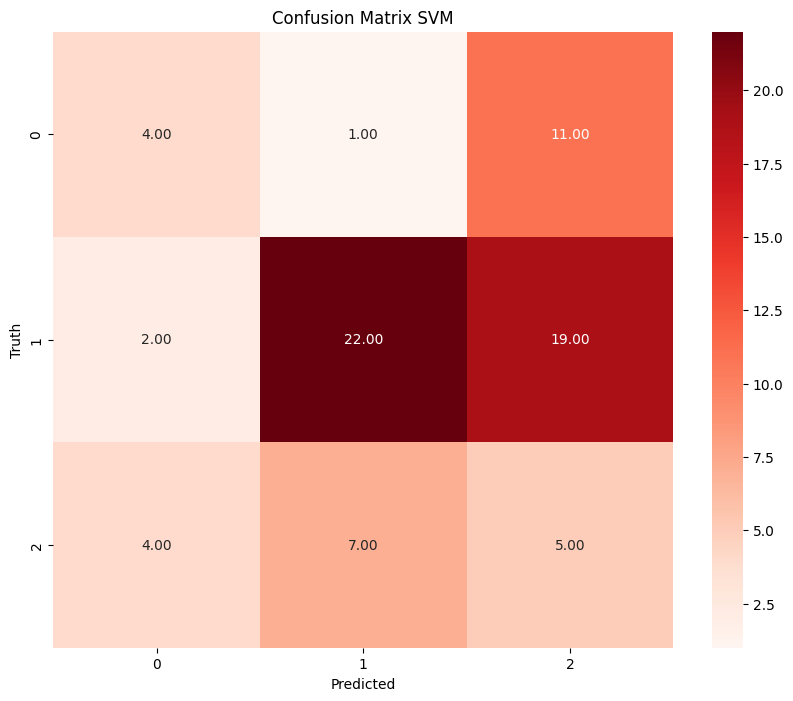

In [19]:
# Evaluasi hasil prediksi klasifikasi
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Membuat Plot Headmap
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='.2f', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix SVM')
plt.show()

2. Classification Report SVM

In [20]:
# Evaluasi hasil prediksi klasifikasi
class_report = classification_report(y_test, y_pred)

# Tampilkan Classification Report
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.25      0.31        16
           1       0.73      0.51      0.60        43
           2       0.14      0.31      0.20        16

    accuracy                           0.41        75
   macro avg       0.43      0.36      0.37        75
weighted avg       0.54      0.41      0.45        75



### A3. Plot Hasil Prediksi

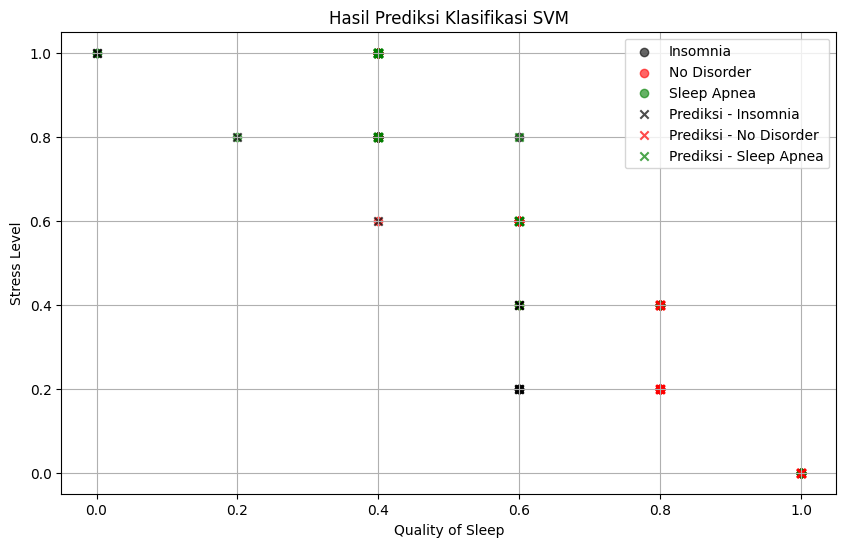

In [21]:
# Membuat Plot untuk hasil prediksi
plt.figure(figsize=(10, 6))

# Plot titik-titik asli berdasarkan label asli
colors = {0: 'black', 1: 'red', 2: 'green'}
labels = {0: 'Insomnia', 1: 'No Disorder', 2: 'Sleep Apnea'}

# Plot titik asli
for label in np.unique(y_test):
    plt.scatter(X_test['Quality of Sleep'][y_test == label],
                X_test['Stress Level'][y_test == label],
                color=colors[label], label=labels[label], alpha=0.6)

# Plot titik prediksi
for label in np.unique(y_pred):
    plt.scatter(X_test['Quality of Sleep'][y_pred == label],
                X_test['Stress Level'][y_pred == label],
                marker='x', color=colors[label],
                label=f'Prediksi - {labels[label]}', alpha=0.7)

# Menambahkan label dan judul
plt.xlabel('Quality of Sleep')
plt.ylabel('Stress Level')
plt.title('Hasil Prediksi Klasifikasi SVM')
plt.legend()
plt.grid(True)
plt.show()

## Linear Regression

Regresi
-	Fitur (x) :  Stress Level, Sleep Duration
-	Target/label (y) : Quality of Sleep

Alasan memilih fitur dan target berdasarkan korelasi:

- Target: Quality of Sleep dipilih karena merupakan variabel numerik dan memiliki korelasi yang kuat dengan beberapa fitur.

- Fitur:

1. Stress Level: Korelasi negatif kuat dengan Quality of Sleep (-0.90), artinya stres tinggi berhubungan dengan kualitas tidur yang buruk.
2. Sleep Duration: Korelasi positif kuat dengan Quality of Sleep (0.88), menunjukkan bahwa durasi tidur yang lebih lama berkaitan dengan kualitas tidur yang lebih baik.

Keduanya dipilih karena memiliki korelasi tinggi dengan target, sehingga berpengaruh dalam memprediksi Quality of Sleep.

### A1. Implementasi Metode

In [22]:
# 2.1. Memilih fitur dan target
X_reg = df[['Stress Level', 'Sleep Duration']]
y_reg = df['Quality of Sleep']

# 2.2. Train-test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Inisialisasi model Linear Regression dan latih pada data regresi
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train_reg, y_train_reg)

# Prediksi hasil pada data uji
y_pred_reg = lin_reg_model.predict(X_test_reg)


Memilih Fitur dan Target:

- Variabel X_reg berisi dua fitur: Stress Level dan Sleep Duration. Variabel y_reg adalah target yang ingin diprediksi, yaitu Quality of Sleep.

Train-Test Split:

- Data dibagi menjadi data pelatihan (80%) dan data pengujian (20%) menggunakan train_test_split. Parameter random_state=42 memastikan bahwa pembagian data dapat direproduksi.

Inisialisasi dan Melatih Model:

- Objek model regresi linier dibuat dengan LinearRegression(), dan dilatih menggunakan data pelatihan dengan metode fit().

Prediksi Hasil:
- Model yang dilatih kemudian digunakan untuk memprediksi nilai kualitas tidur pada data pengujian dengan metode predict(), hasilnya disimpan dalam variabel y_pred_reg.

### A2. Evaluasi Hasil Prediksi

In [23]:
# Evaluasi hasil prediksi regresi
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred_reg)

# Tampilkan metrik evaluasi regresi
print(f"\nMean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


Mean Absolute Error (MAE): 0.07012529178750627
Mean Squared Error (MSE): 0.008006435130556695
Root Mean Squared Error (RMSE): 0.08947868534213438
R-squared (R2): 0.8673220669061353


**Hasil Evaluasi**

Mean Absolute Error (MAE): 0.0701

- MAE menunjukkan rata-rata selisih absolut antara nilai prediksi dan sebenarnya. Nilai ini menunjukkan bahwa, secara rata-rata, prediksi kualitas tidur berbeda sekitar 0.0701 dari nilai sebenarnya, yang tergolong rendah dan menunjukkan akurasi yang baik.

Mean Squared Error (MSE): 0.0080

- MSE adalah rata-rata kuadrat dari kesalahan prediksi. Nilai ini sebesar 0.0080 menunjukkan kesalahan prediksi keseluruhan yang sangat rendah. MSE memberikan penalti lebih besar untuk kesalahan besar, sehingga nilai ini menunjukkan kinerja yang baik.

Root Mean Squared Error (RMSE): 0.0895

- RMSE adalah akar kuadrat dari MSE dan mengembalikan kesalahan ke unit yang sama dengan target. Nilai 0.0895 berarti kesalahan prediksi rata-rata adalah sekitar 0.0895, yang menunjukkan akurasi yang baik dalam prediksi.

R-squared (R²): 0.8673

- R² menunjukkan seberapa baik model menjelaskan variansi dalam data. Nilai 0.8673 menunjukkan bahwa sekitar 86.73% variansi dalam kualitas tidur dapat dijelaskan oleh model, menandakan model yang cukup baik.

### A3. Plot Hasil Prediksi

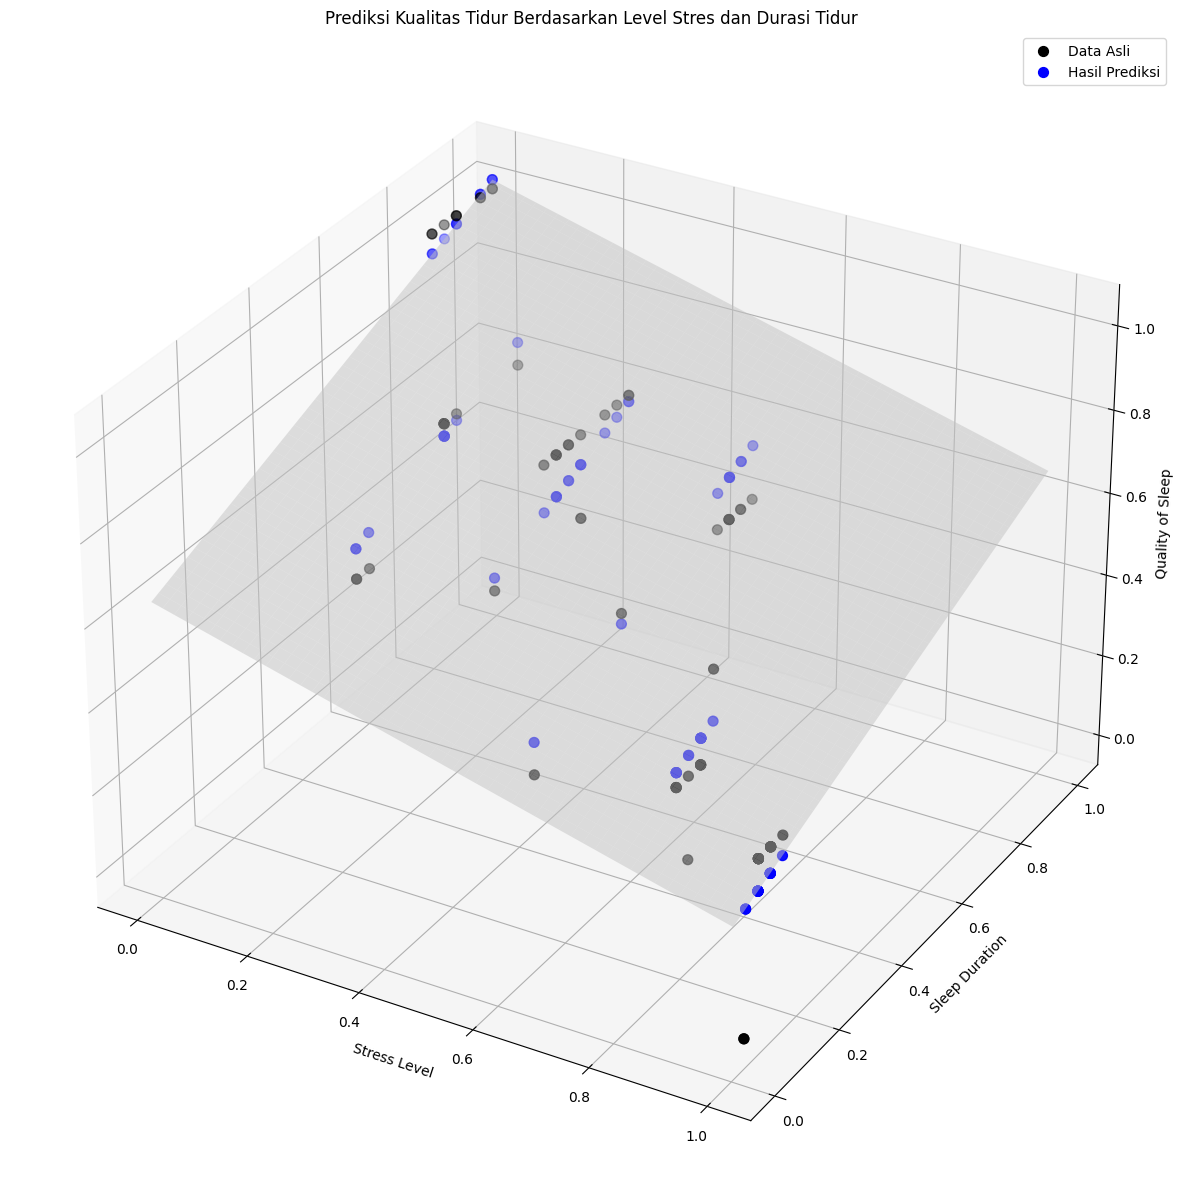

In [24]:
# Membuat grid untuk permukaan regresi
stress_levels = np.linspace(X_reg['Stress Level'].min(), X_reg['Stress Level'].max(), 100)
sleep_durations = np.linspace(X_reg['Sleep Duration'].min(), X_reg['Sleep Duration'].max(), 100)
stress_grid, sleep_grid = np.meshgrid(stress_levels, sleep_durations)

# Menghitung prediksi untuk setiap titik di grid
X_grid = pd.DataFrame(np.column_stack((stress_grid.ravel(), sleep_grid.ravel())),
                      columns=['Stress Level', 'Sleep Duration'])  # Menambahkan nama kolom
y_grid = lin_reg_model.predict(X_grid).reshape(stress_grid.shape)

# Membuat plot 3D
fig = plt.figure(figsize=(15, 20))
ax = fig.add_subplot(111, projection='3d')

# Plot titik-titik asli
ax.scatter(X_test_reg['Stress Level'], X_test_reg['Sleep Duration'], y_test_reg,
           color='black', label='Data Asli', s=50)  # s adalah ukuran titik

# Plot titik-titik prediksi
ax.scatter(X_test_reg['Stress Level'], X_test_reg['Sleep Duration'], y_pred_reg,
           color='blue', label='Hasil Prediksi', s=50)

# Plot permukaan regresi
ax.plot_surface(stress_grid, sleep_grid, y_grid, color='white', alpha=0.5)

# Menambahkan label dan judul
ax.set_xlabel('Stress Level')
ax.set_ylabel('Sleep Duration')
ax.set_zlabel('Quality of Sleep')
ax.set_title('Prediksi Kualitas Tidur Berdasarkan Level Stres dan Durasi Tidur')
ax.legend()

# Tampilkan plot
plt.show()

**Hasil Prediksi Berdasarkan Plot**

- Titik Hitam (Data Asli): Ini menunjukkan data asli yang terdiri dari hubungan antara Stress Level, Sleep Duration, dan Quality of Sleep.
- Titik Biru (Hasil Prediksi): Ini adalah hasil prediksi model regresi.

Secara visual, sebagian besar titik prediksi (biru) berdekatan dengan titik data asli (hitam), yang menunjukkan bahwa model telah memprediksi dengan cukup baik.

**Kesimpulan dari Visualisasi:**
- Kecocokan Model: Titik-titik prediksi biru sebagian besar berdekatan dengan titik hitam, menunjukkan bahwa model menangkap pola hubungan antara - Stress Level, Sleep Duration, dan Quality of Sleep dengan baik.
- Error: Meskipun ada beberapa perbedaan, terutama pada bagian dengan Stress Level dan Sleep Duration yang lebih ekstrem (mendekati 0 atau 1),secara keseluruhan prediksi tampak konsisten.

**Apakah Sesuai dengan Evaluasi?**

Berdasarkan metrik evaluasi:

- Mean Absolute Error (MAE): 0.0701 menunjukkan bahwa rata-rata perbedaan antara prediksi dan nilai asli adalah kecil, yang didukung oleh visualisasi di mana titik prediksi mendekati nilai asli.
- Mean Squared Error (MSE): 0.0080 dan Root Mean Squared Error (RMSE): 0.0895 menunjukkan bahwa kesalahan prediksi juga rendah. Ini sesuai dengan plot yang memperlihatkan sebagian besar titik biru berada di dekat titik hitam.
- R-squared (R²): 0.8673: Dengan nilai R² sekitar 86.73%, model menjelaskan hampir 87% dari variansi dalam data asli, yang sangat baik. Visualisasi mendukung hal ini, karena sebagian besar prediksi mencerminkan pola yang sama dengan data asli.

## Random Forest

Klasifikasi
-	Fitur (x) :  Quality of Sleep, Stress Level
-	Target/label (y) : Sleep disorder

### A1. Implementasi Metode

In [25]:
# Inisialisasi model Random Forest dan latih pada data klasifikasi
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi hasil pada data uji
y_pred_class_rf = rf_model.predict(X_test)

### A2. Evaluasi Hasil Prediksi

1. Confusion Matrix Random Forest

Confusion Matrix (Random Forest):
 [[12  2  2]
 [ 2 31 10]
 [ 4  7  5]]


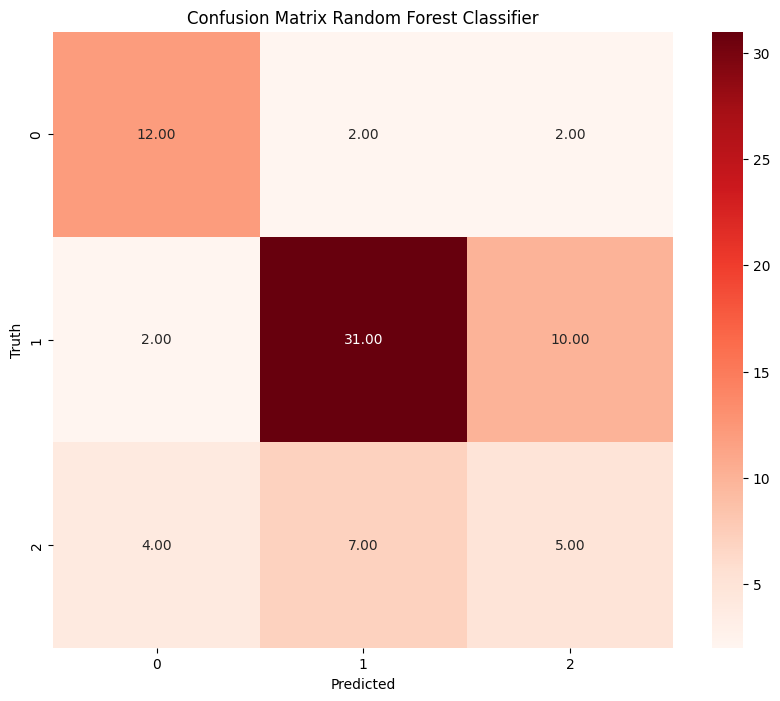

In [26]:
# Evaluasi hasil prediksi Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_class_rf)
print("Confusion Matrix (Random Forest):\n", conf_matrix_rf)

# Membuat Plot
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix_rf, annot=True, fmt='.2f', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix Random Forest Classifier')
plt.show()

**Penjelasan Evaluasi Confusion Matrix:**
Diagonal utama (12, 31, 5) menunjukkan jumlah prediksi yang benar untuk masing-masing kelas.
- Insomnia (Kelas 0): 12 prediksi benar.
- No Disorder (Kelas 1): 31 prediksi benar.
- Sleep Apnea (Kelas 2): 5 prediksi benar.

Off-diagonal menunjukkan jumlah salah klasifikasi, di mana prediksi tidak sesuai dengan kebenarannya:

2. Classification Report Random Forest

In [27]:
# Evaluasi hasil prediksi Random Forest
class_report_rf = classification_report(y_test, y_pred_class_rf)
print("\nClassification Report (Random Forest):\n", class_report_rf)


Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.67      0.75      0.71        16
           1       0.78      0.72      0.75        43
           2       0.29      0.31      0.30        16

    accuracy                           0.64        75
   macro avg       0.58      0.59      0.59        75
weighted avg       0.65      0.64      0.64        75



### A3. Plot Hasil Prediksi

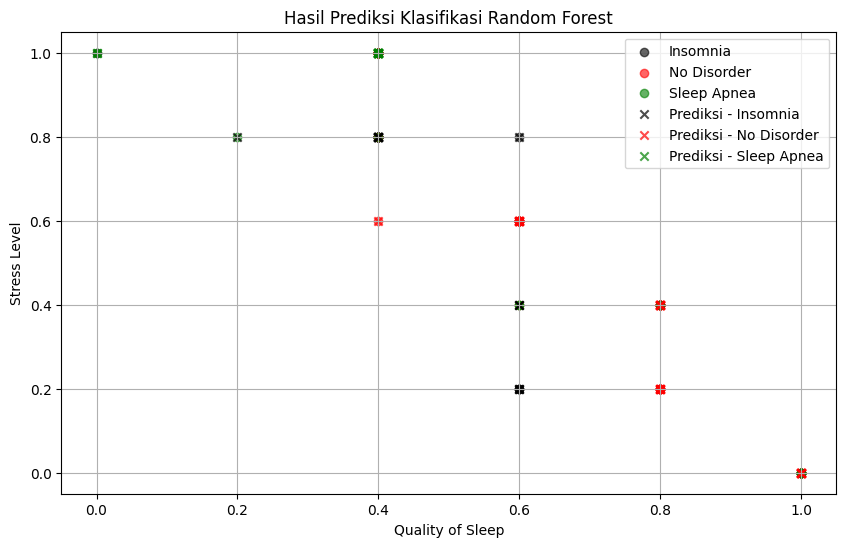

In [28]:
# Membuat Plot untuk hasil prediksi Random Forest
plt.figure(figsize=(10, 6))

# Warna dan label untuk kategori
colors = {0: 'black', 1: 'red', 2: 'green'}
labels = {0: 'Insomnia', 1: 'No Disorder', 2: 'Sleep Apnea'}

# Plot titik asli berdasarkan label asli
for label in np.unique(y_test):
    plt.scatter(X_test['Quality of Sleep'][y_test == label],
                X_test['Stress Level'][y_test == label],
                color=colors[label], label=labels[label], alpha=0.6)

# Plot titik prediksi Random Forest
for label in np.unique(y_pred_class_rf):
    plt.scatter(X_test['Quality of Sleep'][y_pred_class_rf == label],
                X_test['Stress Level'][y_pred_class_rf == label],
                marker='x', color=colors[label],
                label=f'Prediksi - {labels[label]}', alpha=0.7)

# Menambahkan label dan judul
plt.xlabel('Quality of Sleep')
plt.ylabel('Stress Level')
plt.title('Hasil Prediksi Klasifikasi Random Forest')
plt.legend()
plt.grid(True)
plt.show()

Plot diatas menunjukkan hasil klasifikasi Random Forest untuk memprediksi gangguan tidur berdasarkan dua variabel: Kualitas Tidur dan Tingkat Stres.

Setiap titik prediksi ditandai dengan tanda 'X', menunjukkan prediksi model terhadap kelas asli dengan skema warna yang sama.

**Penjelasan Berdasarkan Plot:**
- Insomnia (Kelas 0): Sebagian besar titik asli dan prediksi untuk insomnia berkumpul di tingkat stres yang tinggi dan kualitas tidur yang lebih rendah.
- No Disorder (Kelas 1): Model cukup baik memprediksi beberapa kasus "Tidak Ada Gangguan" (di sekitar kualitas tidur yang lebih baik), tetapi ada beberapa salah klasifikasi (ditandai dengan 'X' merah di kualitas tidur yang lebih rendah).
- Sleep Apnea (Kelas 2): Prediksi untuk Sleep Apnea terlihat agak tersebar. Kluster menunjukkan bahwa tingkat stres yang lebih tinggi sering diprediksi sebagai Sleep Apnea, meskipun nilai recall dari laporan menunjukkan model kesulitan dalam mendeteksi kelas ini dengan baik.


**Laporan classification report memberikan metrik berikut:**

- Akurasi = 64%: Akurasi keseluruhan prediksi tergolong sedang. Ini sesuai dengan penyebaran prediksi, di mana beberapa salah klasifikasi terlihat, terutama untuk "Tidak Ada Gangguan."
- Presisi & Recall untuk Kelas 0 (Insomnia): Presisi 67%, dan recall 75%, yang berarti model cukup baik dalam memprediksi insomnia, namun beberapa kasus lain bisa salah diklasifikasikan sebagai insomnia.

- Kelas 1 (Tidak Ada Gangguan): Presisi 78%, artinya hanya sedikit positif palsu. Namun, recall 72% menunjukkan adanya beberapa negatif palsu dalam prediksi.
- Kelas 2 (Sleep Apnea): Presisi dan recall rendah pada 29% dan 31%. Ini menunjukkan model kesulitan mendeteksi kasus Sleep Apnea secara akurat, yang juga terlihat dari perbedaan prediksi dan kelas asli dalam grafik untuk kelas ini.

**Kesimpulannya, grafik ini sejalan dengan laporan klasifikasi:**

- Insomnia umumnya diprediksi dengan cukup akurat.
- Tidak Ada Gangguan menunjukkan performa sedang.
- Sleep Apnea memiliki performa terlemah, baik di grafik maupun dalam laporan.